## Density BAsed Spatial Clustering Of Applications with Noise(DBSCAN)

In [1]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# Check the Matplotlib Version

print("Matplotlib Version", matplotlib.__version__)

Matplotlib Version 3.4.3


### Using DBSCAN for Tasks like Class Identification On a Spatial Context



Usually 2 parameters for DBSCAN to Optimize 
* <font color='red'>Epsilon</font> 
* <font color='red'>Minimum Points</font>

<font color='red'>Epsilon $(\epsilon)$ </font> determines how much close the points should be to be considered a part of a cluster and <font color='red'>Minimum Points _(MinPts)_ </font> determines how many number of samples (points) need to be considered around a point within the radius $\epsilon$ to be considered as a _Core Point_. _MinPts_ include the point in consideration itself.   


We start with loading the Canada Weather Data-Set. We will __cluster weather stations that show similar weather conditions__. Selection of features and applications on clustering will be shown. Since the data domain is not so well understood, it is always best to play around with $\epsilon$ and _MinPts_ parameter in Scikit learn.  

In [3]:
import pandas as pd

weather_df = pd.read_csv("weather-stations.csv")
print("Shape of the DataFrame: ", weather_df.shape)
weather_df.head(2)

Shape of the DataFrame:  (1341, 25)


,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,...,DwP,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD,Stn_No
0,CHEMAINUS,48.935,-123.742,BC,8.2,0.0,NaN,13.5,0.0,1.0,...,0.0,NaN,0.0,12.0,NaN,NaN,NaN,273.3,0.0,1011500
1,COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.0,0.0,3.0,15.0,0.0,-3.0,...,0.0,104.0,0.0,12.0,NaN,NaN,NaN,307.0,0.0,1012040


So, there are 25 columns and the names of columns are difficult to guess.

In [4]:
weather_df.columns

Index(['Stn_Name', 'Lat', 'Long', 'Prov', 'Tm', 'DwTm', 'D', 'Tx', 'DwTx',
       'Tn', 'DwTn', 'S', 'DwS', 'S%N', 'P', 'DwP', 'P%N', 'S_G', 'Pd', 'BS',
       'DwBS', 'BS%', 'HDD', 'CDD', 'Stn_No'],
      dtype='object')

here we are going to elaborate the columns name:

* Stn_Name === Station Name
* Prov     === Province
* Tm       === Mean Temperature (°C)
* Tn       === Lowest Monthly Minimum Temperature 
* Tx       === Highest Monthly Maximum Temperature 
* DwTm     === Days Without Valid Mean Temperature
* DwTx     === Days Without Valid Maximum Temperature
* DwTn     === Days Without Valid Minimum Temperature
* D        === Mean Temperature Difference from Normal
* S        === Snowfall (cm)
* DwS      === Days Without Snowfall
* S%N      === Percent of Normal Snowfall
* P        === Total Precipitation (mm)
* DwP      === Days Without Valid Precipitation
* P%N      === Percent of Normal Precipitation
* Pd       === No. of days with precipitation 1mm or More 
* BS       === Bright Sunshine days
* DwBS     === Days Without valid Bright Sunshine
* BS%      === Percent of Normal Bright Sunshine
* HDD      === Degree Days Below $18^{\circ}$C 
* CDD      === Degree Days Above $18^{\circ}$C
* Stn_No   === Station Number; Climate Station Identifier (1st 3 Digits==Indicate drainage basin, Last 4 Digits Sorting Alphabetically)


We can see that are some columns which are having NaN Values. One of the important features is Mean temperature(Tm), so we drop the rows that contain NaN values in Tm column.

In [5]:
# Checking the NAN values inj dataframe:

weather_df.isna().sum()

Stn_Name       0
Lat            0
Long           0
Prov           0
Tm            85
DwTm          85
D            984
Tx            81
DwTx          81
Tn            81
DwTn          81
S            755
DwS          755
S%N         1143
P            114
DwP          114
P%N         1132
S_G          543
Pd           114
BS          1341
DwBS        1341
BS%         1341
HDD           85
CDD           85
Stn_No         0
dtype: int64

In [9]:
# dropping the NaN values from Rows in 'Tm', 'Tx', 'Tn':

weather_df.dropna(subset=["Tm", "Tx", "Tn"], inplace=True)
print("After Dropping Rows that contains Nan on Mean, Max, Min Temperature column:  ", weather_df.shape)

After Dropping Rows that contains Nan on Mean, Max, Min Temperature column:   (1255, 25)


In [10]:
import matplotlib

C:\Users\amita\AppData\Local\Temp/ipykernel_14828/956933269.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_df['xm'] = xs.tolist()
C:\Users\amita\AppData\Local\Temp/ipykernel_14828/956933269.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_df['ym'] = ys.tolist()


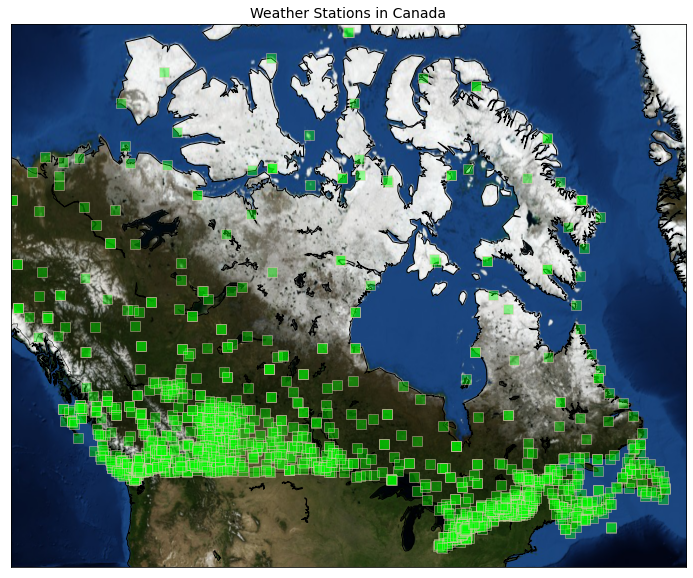

In [15]:
from mpl_toolkits.basemap import Basemap
from PIL import Image
import matplotlib.pyplot as plt

from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (15,10)

llon = -140
ulon = -50
llat = 40
ulat = 75

# selecting the boundries of the map from lattitude and longitude:

weather_df = weather_df[(weather_df['Long'] > llon) & (weather_df['Long'] < ulon) &
                        (weather_df['Lat'] > llat) & (weather_df['Lat'] < ulat)]

my_map = Basemap(projection = 'merc',
                resolution = 'l', area_thresh = 1000.0,
                llcrnrlon = llon, llcrnrlat=llat, # min longitude (llcrnrlon) and latitude (llcrnrlat)
                urcrnrlon=ulon, urcrnrlat=ulat) # max longitude (urcrnrlon) and latitude(urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
my_map.drawlsmask(land_color='orange', ocean_color='skyblue')
#my_map.shadedrelife()
my_map.bluemarble()

# To collect data based on stations:

xs, ys = my_map(np.asarray(weather_df.Long), np.asarray(weather_df.Lat))
weather_df['xm'] = xs.tolist()
weather_df['ym'] = ys.tolist()

#Visualization1:
for index, row in weather_df.iterrows():
    # x,y = my_map(row.long, row.Lat)
    my_map.plot(row.xm, row.ym, markerfacecolor = 'lime', markeredgecolor = 'pink', marker = 's', markersize= 10, alpha = 0.4)
# plt.text(x,y,stn)
plt.title("Weather Stations in Canada", fontsize = 14)
plt.savefig("Canada_WS.png", dpi = 300)
plt.show()

### Clustering Weather Stations BAsed on Mean. Maximum and Minimum Temperature.

In the DataFrame the variable are Tm, Tn, Tx.
First checking the distribution of the temperatures to get an rough Idea. Find the maximum, minimum of these three features to get a rough idea.

In [16]:
# using datframe min max function to get the mean, max, min values:

print("Minimum Mean temperature:", weather_df['Tm'].min())
print("Minimum Max temperature:", weather_df['Tx'].min())
print("Maximum Min temperature:", weather_df['Tn'].max())

Minimum Mean temperature: -37.0
Minimum Max temperature: -28.9
Maximum Min temperature: 5.3


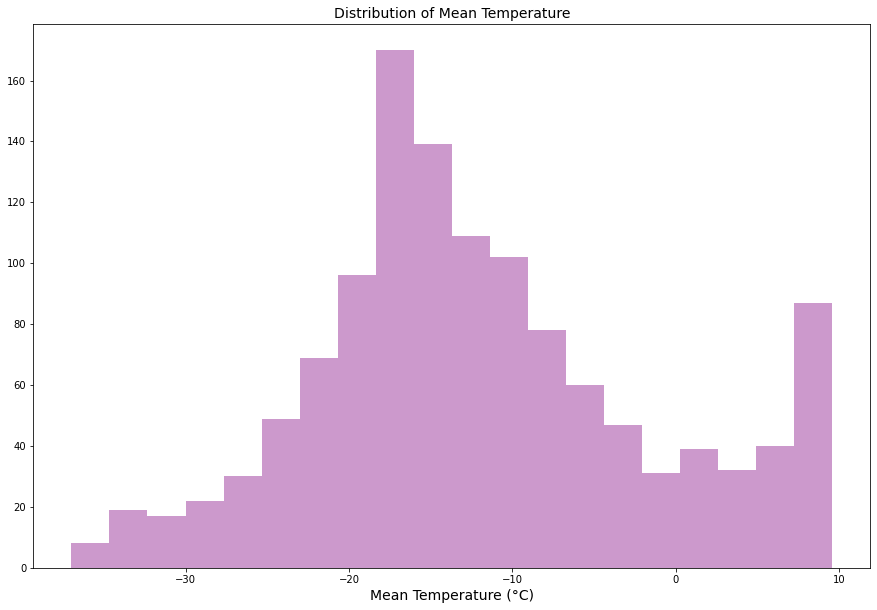

In [18]:
# Creating distribution plot of the Temperature:

import seaborn as sns 

sns.distplot(weather_df['Tm'], color = 'purple', kde=False)
plt.xlabel("Mean Temperature (°C)", fontsize=14)
plt.title("Distribution of Mean Temperature", fontsize=14)
plt.savefig("Dist_of_Mean_Temp.png", dpi=200)
plt.show()

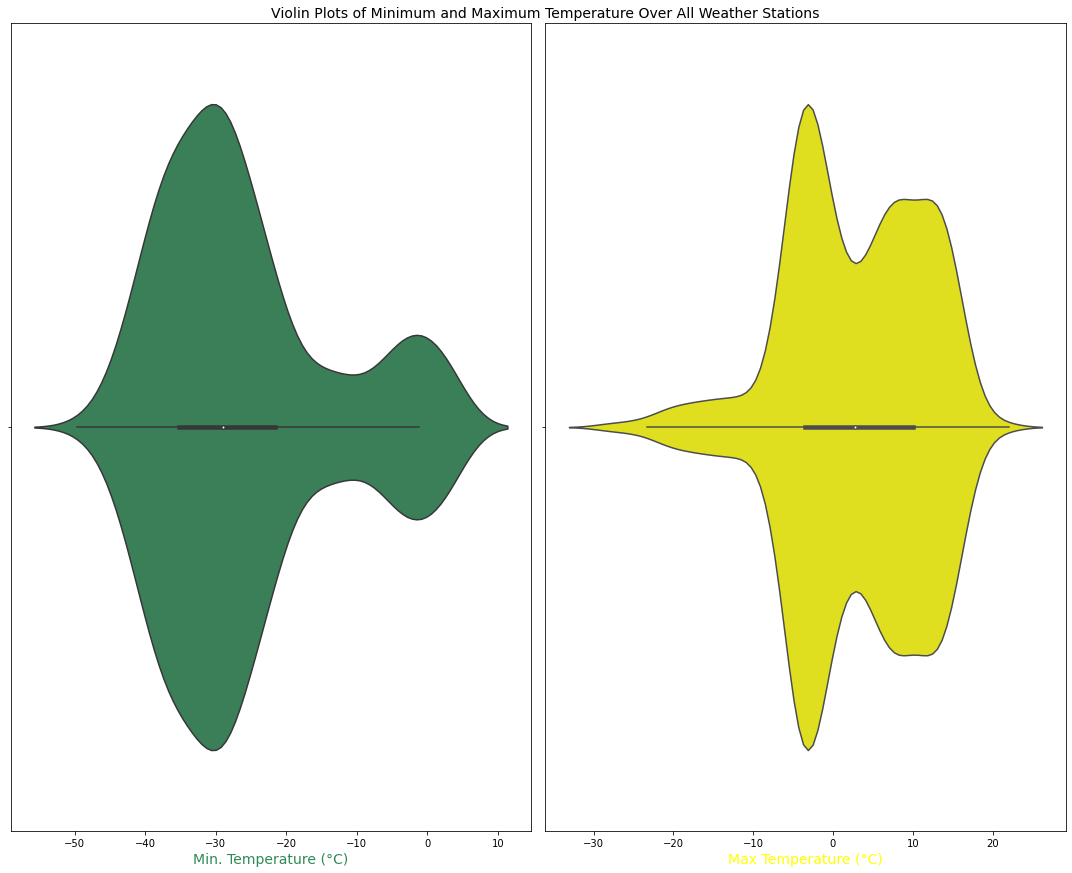

In [30]:
# Violin Plots of Minimum and maximum Temperature:

fig = plt.figure(figsize=(15, 12))
plt.subplot(1,2,1)
sns.violinplot(x=weather_df["Tn"], color='seagreen')
plt.xlabel("Min. Temperature (°C)", fontsize=14, color='seagreen')
plt.subplot(1,2,2)
sns.violinplot(x=weather_df["Tx"], color="yellow")
plt.xlabel("Max Temperature (°C)", fontsize=14, color="yellow")
plt.tight_layout()
plt.title("Violin Plots of Minimum and Maximum Temperature Over All Weather Stations", fontsize=14, x=-0.0)
plt.savefig("Violin_Plots_Min_Max_Temp.png", dpi=200)
plt.show()

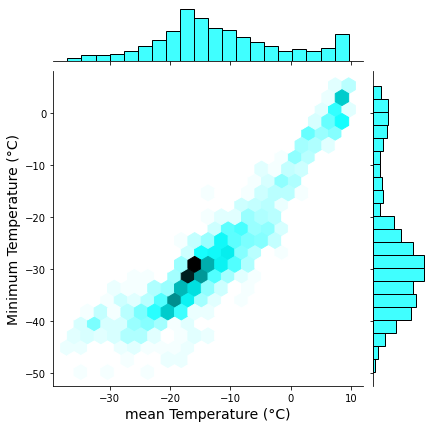

In [32]:
# Join Plot of Mean Temperature and Minimum Temperature:

g=sns.jointplot(x=weather_df['Tm'], y=weather_df['Tn'], kind='hex', color='Aqua')
g.set_axis_labels("mean Temperature (°C)", "Minimum Temperature (°C)", fontsize=14)
plt.savefig("Her_Tm_Tn.png", dpi=200)
plt.show()

### Proceed To Clustering using DBSCAN

In [34]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
weather_df_clus_temp = weather_df[['Tm', 'Tx', 'Tn', 'xm', 'ym']]
weather_df_clus_temp = StandardScaler().fit_transform(weather_df_clus_temp)

db = DBSCAN(eps = 0.3, min_samples=10).fit(weather_df_clus_temp)

labels = db.labels_
print(labels[500:560])
weather_df["Clus_Db"] = labels

realClusteNum = len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels))

[ 4  4  4  4  4  4  4  4  4  3  4  3  4  3  4  4  4  4  4  4  4  4  4  4
  4  4 -1  4  4  4 -1  4 -1  3 -1  4 -1  3  3  3  3  3  3  3  3  3  3  3
 -1 -1  3  3  3  3 -1  3  3  3  3  3]


In [35]:
set(labels)

{-1, 0, 1, 2, 3, 4, 5, 6, 7}

C:\Users\amita\AppData\Local\Temp/ipykernel_14828/1591238425.py:25: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  c=(([0.4,0.4,0.4]) if clust_Number == -1 else color[np.int(clust_Number)])


Cluster 0, Average Mean Temp: 6.240677966101697
Cluster 1, Average Mean Temp: -0.5523809523809524
Cluster 2, Average Mean Temp: -3.244444444444445
Cluster 3, Average Mean Temp: -13.733725490196077
Cluster 4, Average Mean Temp: -4.153703703703704
Cluster 5, Average Mean Temp: -16.401294498381873
Cluster 6, Average Mean Temp: -10.08421052631579
Cluster 7, Average Mean Temp: -4.70625


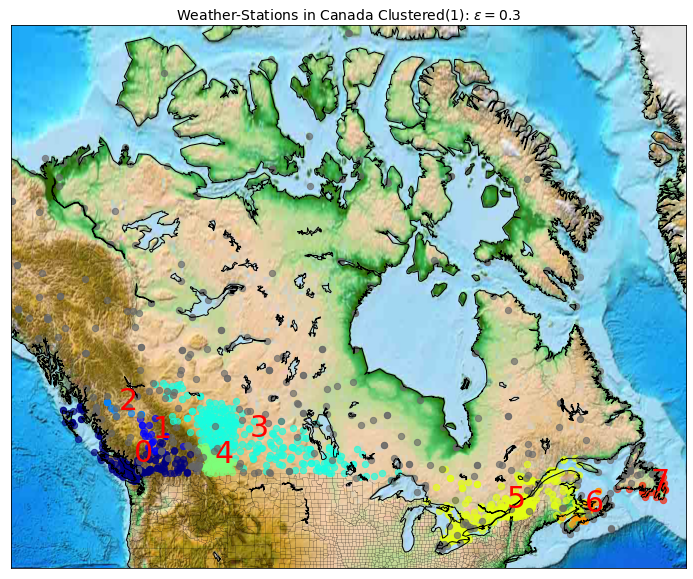

In [44]:
# Plotting the cluster in the map:

from  mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (15,10)

my_map = Basemap(projection = 'merc',
                resolution='l', area_thresh = 1000.0,
                llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
                urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcounties()
my_map.drawlsmask(land_color='orange', ocean_color='deepskyblue')
my_map.etopo()

# to create a color map:
color = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))

# Visualization1:

for clust_Number in set(labels):
    c=(([0.4,0.4,0.4]) if clust_Number == -1 else color[np.int(clust_Number)])
    clust_set = weather_df[weather_df.Clus_Db == clust_Number]
    my_map.scatter(clust_set.xm, clust_set.ym, color = c, marker='o', s=40, alpha = 0.65)
    if clust_Number != -1:
        cenx = np.mean(clust_set.xm)
        ceny = np.mean(clust_set.ym)
        plt.text(cenx,ceny, str(clust_Number), fontsize=30, color='red',)
        print("Cluster "+str(clust_Number)+', Average Mean Temp: '+ str(np.mean(clust_set.Tm)))
plt.title(r"Weather-Stations in Canada Clustered(1): $ \epsilon = 0.3$", fontsize=14)
plt.savefig("etopo_cluster.png", dpi=300)

### Reapeat The Process One More Time Including Precipitation as Feature

In [46]:
# Stop the SettingWithCopyWarning:

pd.options.mode.chained_assignment = None # default='warn'

from sklearn.cluster import DBSCAN
import sklearn.utils
from  sklearn.preprocessing import StandardScaler
weather_df_copy = weather_df.copy()
weather_df_clus_temp_P = weather_df_copy[['Tm', 'Tx', 'Tn', 'xm', 'ym', 'P']]

weather_df_clus_temp_P.dropna(subset=['Tm', 'Tx', 'Tn', 'xm', 'ym', 'P'], inplace=True)
print("After Dropping Rows that contains NaN on Precipitation Column: ", weather_df_clus_temp_P.shape)

print(weather_df_clus_temp_P.head(6))

After Dropping Rows that contains NaN on Precipitation Column:  (1136, 6)
    Tm    Tx   Tn            xm            ym      P
0  8.2  13.5  1.0  1.807806e+06  1.396332e+06  178.8
1  7.0  15.0 -3.0  1.764329e+06  1.377564e+06  258.6
2  6.8  16.0 -2.5  1.773336e+06  1.378409e+06  264.6
4  7.7  14.5 -1.0  1.809363e+06  1.362546e+06  168.4
5  8.8  13.1  1.9  1.841498e+06  1.311615e+06   81.0
6  8.9  13.5  2.0  1.826598e+06  1.404800e+06  110.0


In [49]:
weather_df_clus_temp_P_arr = weather_df_clus_temp_P[['Tm', 'Tx', 'Tn', 'xm', 'ym', 'P']]
weather_df_clus_temp_P_arr = StandardScaler().fit_transform(weather_df_clus_temp_P_arr)

db_P = DBSCAN(eps = 0.5, min_samples=10).fit(weather_df_clus_temp_P_arr)
# creating an array of Zeros of same size as db.label_.db.labels_ is an array containing labels for 
labels_P = db_P.labels_
print(labels_P[500:560])
print(labels_P.dtype)

weather_df_clus_temp_P['Clus_Db_'] = labels_P

[ 1  1  1 -1 -1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1 -1 -1 -1  1 -1
 -1 -1  1 -1 -1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1]
int64


In [50]:
weather_df_clus_temp_P.head()

,Tm,Tx,Tn,xm,ym,P,Clus_Db_
0,8.2,13.5,1.0,1.807806e+06,1.396332e+06,178.8,0
1,7.0,15.0,-3.0,1.764329e+06,1.377564e+06,258.6,-1
2,6.8,16.0,-2.5,1.773336e+06,1.378409e+06,264.6,-1
4,7.7,14.5,-1.0,1.809363e+06,1.362546e+06,168.4,0
5,8.8,13.1,1.9,1.841498e+06,1.311615e+06,81.0,0


In [51]:
realClusteNum_P = len(set(labels_P)) - (1 if -1 in  labels_P else 0)
clusterNum_P = len(set(labels_P))

print(set(labels_P))

{0, 1, 2, 3, -1}


C:\Users\amita\AppData\Local\Temp/ipykernel_14828/352795272.py:31: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  c=(([0.4,0.4,0.4]) if clust_number_P == -1 else colors1[np.int(clust_number_P)])


Cluster 0, Average Mean Temp: 7.680246913580246
Cluster 0, Average Mean Precipitation: 126.09999999999997
Cluster 1, Average Mean Temp: -12.53424283765348
Cluster 1, Average Mean Precipitation: 27.415006821282383
Cluster 2, Average Mean Temp: -26.14285714285714
Cluster 2, Average Mean Precipitation: 8.7
Cluster 3, Average Mean Temp: -10.406666666666668
Cluster 3, Average Mean Precipitation: 146.02333333333328


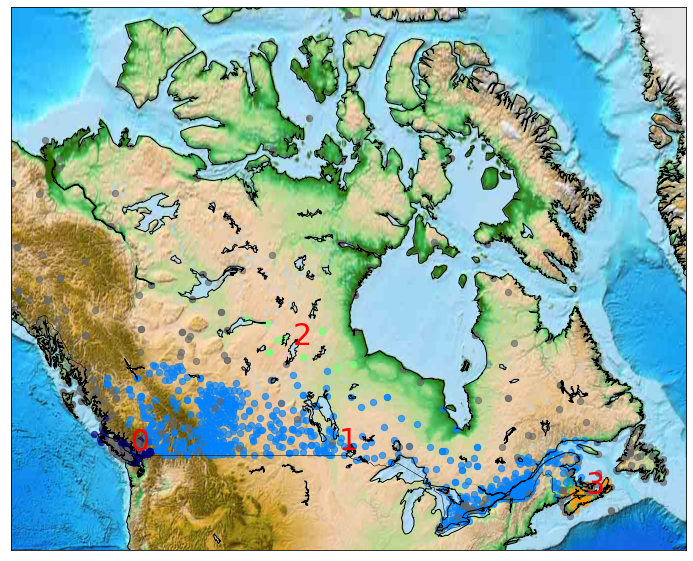

In [52]:
#before we used 7 clusters but this time we reduce the numbers of clusters:

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10)

my_map1 = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map1.drawcoastlines()
my_map1.drawcountries()
#my_map.drawmapboundary()
#my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map1.drawlsmask(land_color='orange', ocean_color='skyblue')
#my_map.shadedrelief()
#my_map.bluemarble()
#my_map.shadedrelief()
my_map1.etopo()

# To create a color map
colors1 = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum_P))



#Visualization1
for clust_number_P in set(labels_P):
    c=(([0.4,0.4,0.4]) if clust_number_P == -1 else colors1[np.int(clust_number_P)])
    clust_set_P = weather_df_clus_temp_P[weather_df_clus_temp_P.Clus_Db_ == clust_number_P]                    
    my_map.scatter(clust_set_P.xm, clust_set_P.ym, color =c,  marker='o', s= 40, alpha = 0.65)
    if clust_number_P != -1:
        cenx=np.mean(clust_set_P.xm) 
        ceny=np.mean(clust_set_P.ym) 
        plt.text(cenx,ceny,str(clust_number_P), fontsize=30, color='red',)
        print ("Cluster "+str(clust_number_P)+', Average Mean Temp: '+ str(np.mean(clust_set_P.Tm)))
        print ("Cluster "+str(clust_number_P)+', Average Mean Precipitation: '+ str(np.mean(clust_set_P.P)))
plt.savefig("etopo_cluster_preci.png", dpi=300)
